In [1]:
from simulate import iterate, set_mb, view_mb, est_area
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

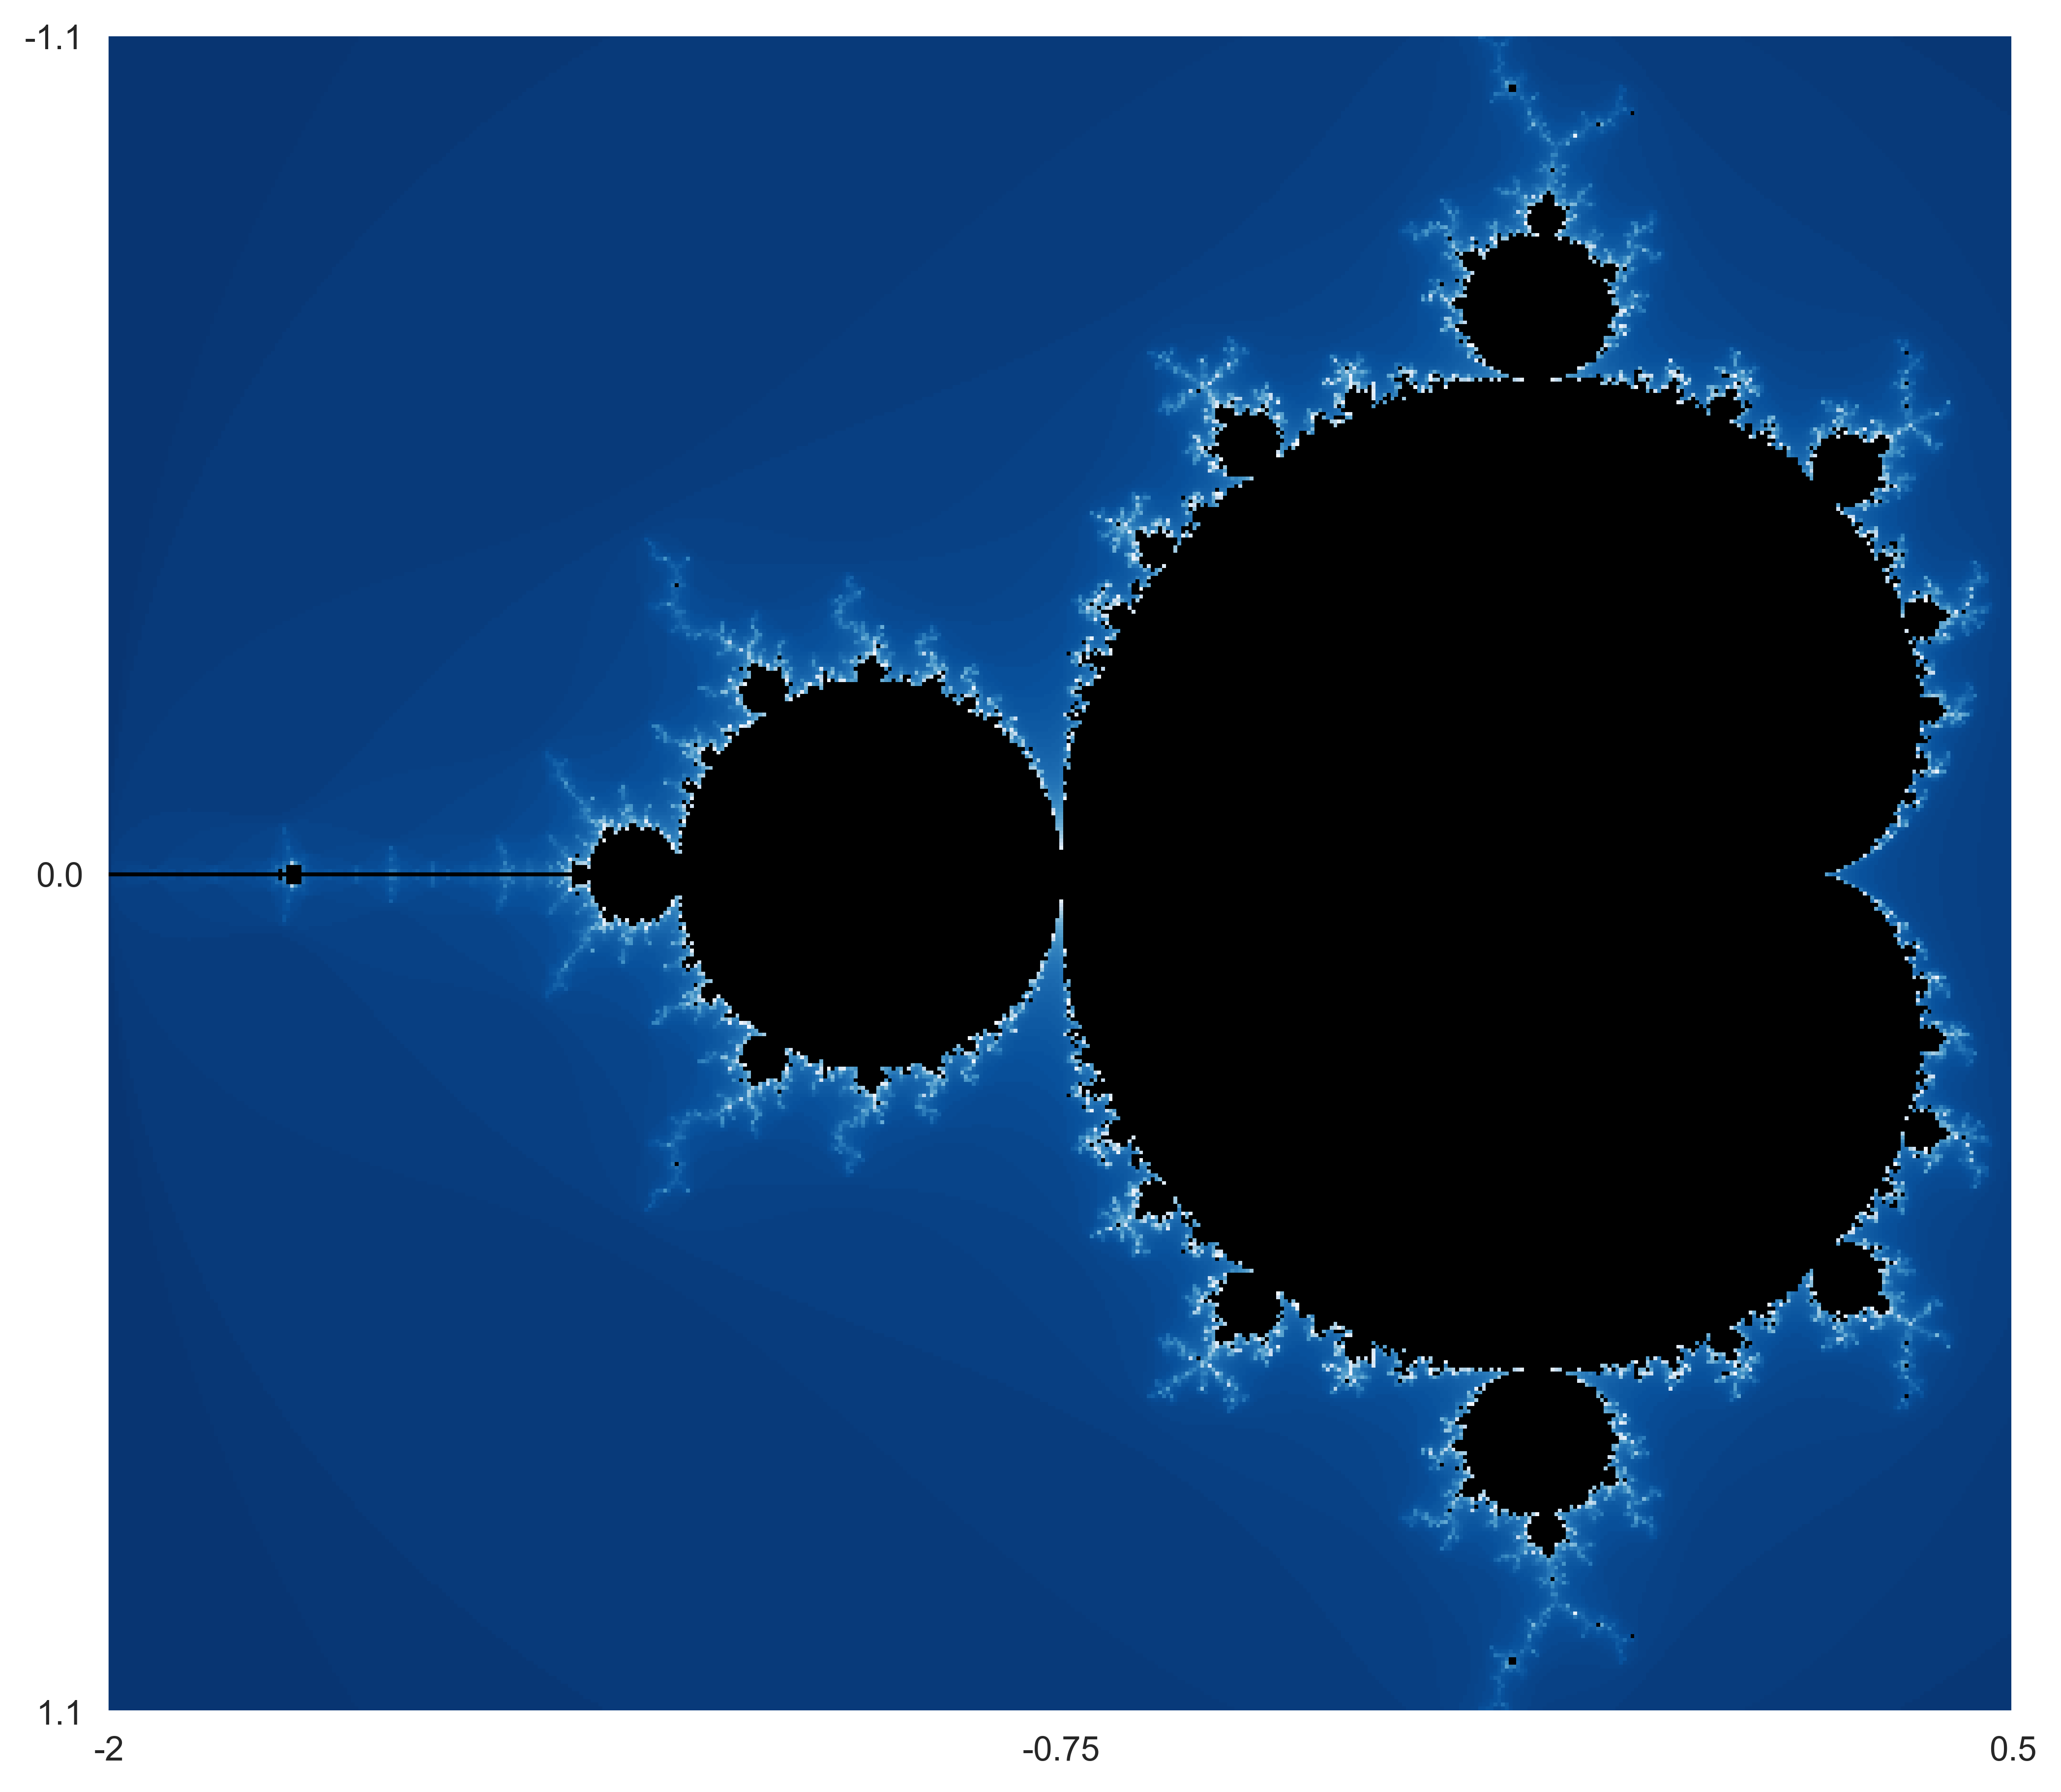

In [2]:
view_mb((-2,.5),(-1.1,1.1),(10,10),dpi=500)
plt.savefig('mandelbrot.pdf',dpi=100)

### Calculate area's for all sampling methods

In [3]:
np.random.seed(10)
n_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
s_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]

start = time.time()
A_pure = est_area(n_list,s_list,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs = est_area(n_list,s_list,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho = est_area(n_list,s_list,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))

1047.0446162223816
2090.590406179428
3169.4082210063934


In [5]:
np.savetxt("pure.csv", A_pure.reshape(A_pure.shape[0], -1), delimiter=",")
np.savetxt("lhs.csv", A_lhs.reshape(A_lhs.shape[0], -1), delimiter=",")
np.savetxt("ortho.csv", A_ortho.reshape(A_ortho.shape[0], -1), delimiter=",")

#loaded_arr = np.loadtxt("geekfile.txt") 
#load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])

### Plot for varying i

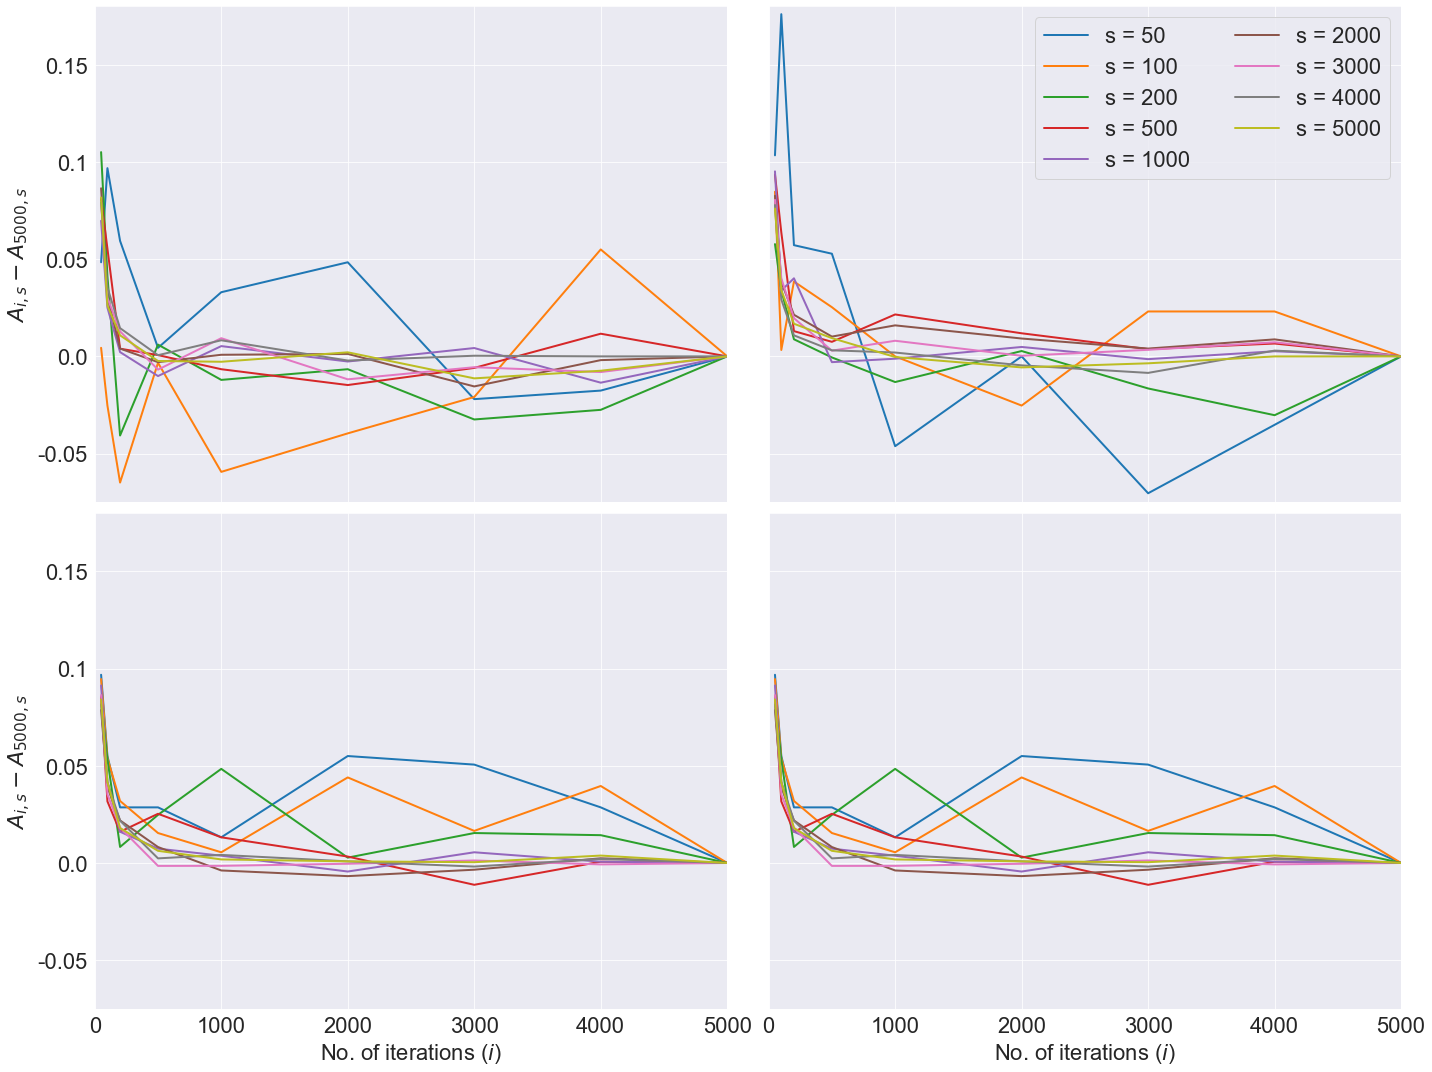

In [38]:
# Calcute area's, plot as function of i and s
# compare sampling techniques with confidence intervals
# Formulate and test a method to further improve the convergence rate of the Monte Carlo approach.
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
#plt.subplots_adjust(hspace=0.15)
for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{5000,s}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.075,0.18))

sampling_list = [A_pure,A_lhs,A_ortho,A_ortho]

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(n_list, delta_mean, linewidth=2, label = "s = {}".format(s_list[s]))
            #axs[0,index].fill_between(n_list, errors_pos, errors_neg, alpha=0.2)
        else:
            axs[1,index-2].plot(n_list, delta_mean, linewidth=2, label = "s = {}".format(s_list[s]))
            #axs[0,index].fill_between(n_list, errors_pos, errors_neg, alpha=0.2)

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('diff_area_iter.pdf',dpi=100)


### Plot for varying s

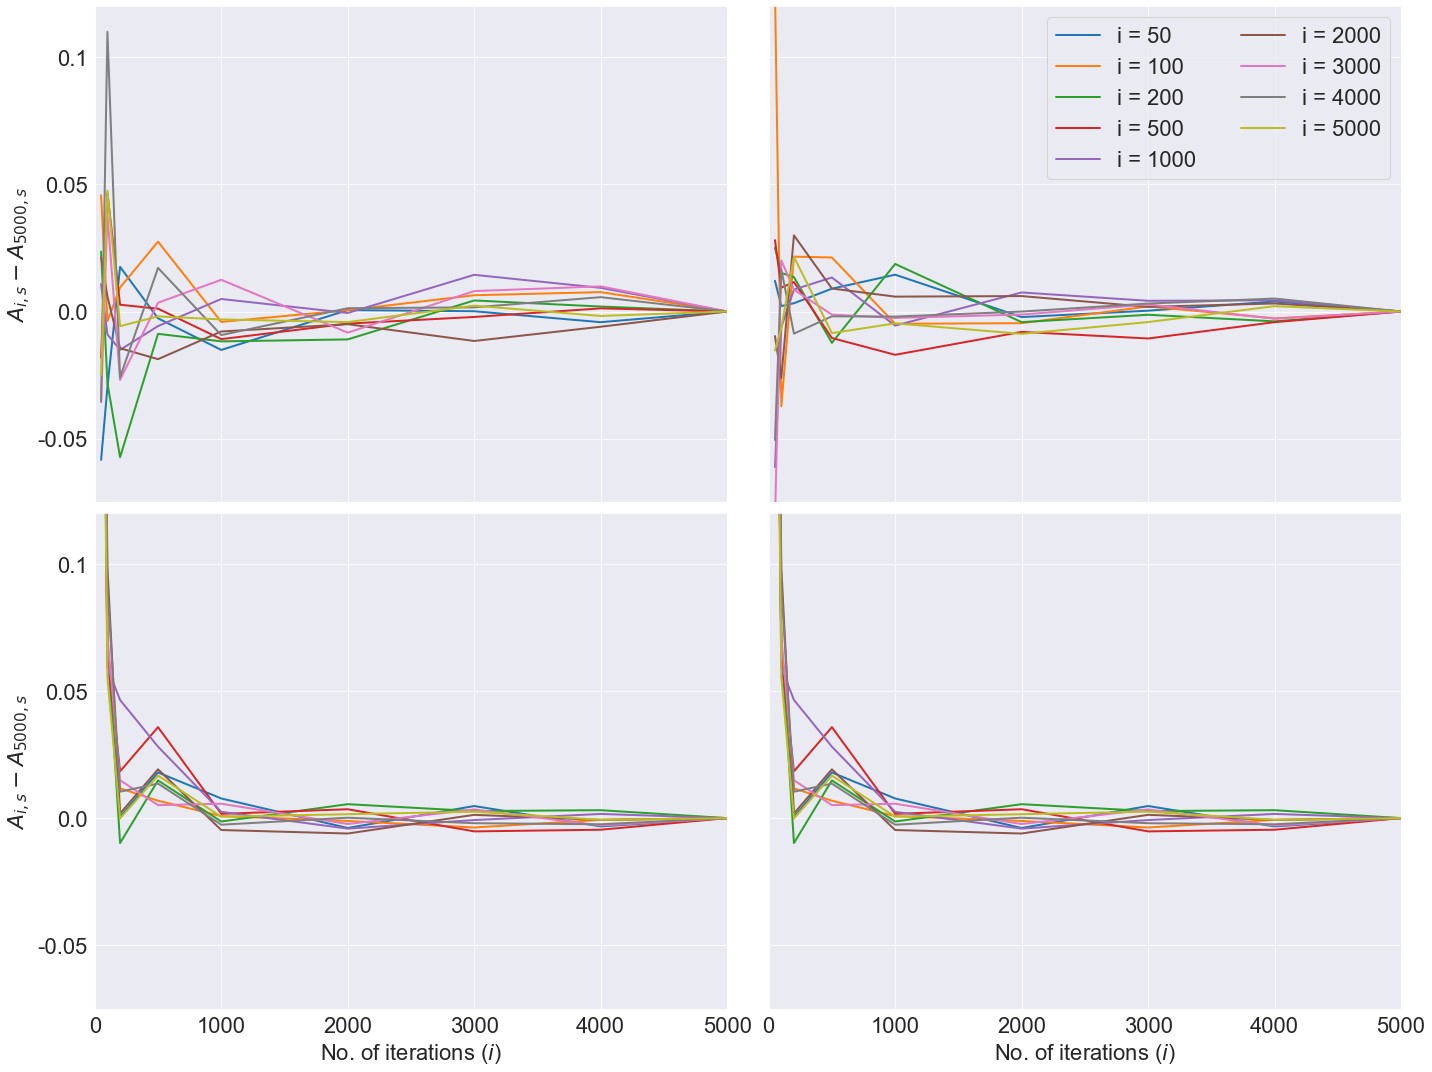

In [40]:
# Calcute area's, plot as function of i and s
# compare sampling techniques with confidence intervals
# Formulate and test a method to further improve the convergence rate of the Monte Carlo approach.
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
#plt.subplots_adjust(hspace=0.15)
for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{5000,s}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,500))
        axs[i,j].set_xticklabels(np.arange(0,5500,500), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,1000))
        axs[i,j].set_xticklabels(np.arange(0,5500,1000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.075,0.12))
sampling_list = [A_pure,A_lhs,A_ortho,A_ortho]

for index in range(len(sampling_list)):
    for i in range(len(n_list)):
        mean = []
        std = []
        for s in range(len(s_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(n_list, delta_mean, linewidth=2, label = "i = {}".format(n_list[i]))
            #axs[0,index].fill_between(n_list, errors_pos, errors_neg, alpha=0.2)
        else:
            axs[1,index-2].plot(n_list, delta_mean, linewidth=2, label = "i = {}".format(n_list[i]))
            #axs[0,index].fill_between(n_list, errors_pos, errors_neg, alpha=0.2)

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('diff_area_iter.pdf',dpi=100)
